# Maternal Health Predictions

1. [Project Summary](#projectsummary)
    * 1.1 [Background](#projectbackground)
    * 1.2 [Dataset](#dataset)
2. [Imports and Early Data Exploration](#imports)

## 1. Project Summary <a class="anchor" id="projectsummary"></a>

#### 1.1 Project Background <a class="anchor" id="projectbackground"></a>

Inspiration for this project came as at the time of working on this project I am expecting my first child, so this is kind of my nerdy way of fully understanding Maternal Health. I am attempting to pinpoint key trends that will establish the level of risk associated with maternal complications for an expecting mother. Creating an accurate model in this context will supply healthcare experts with a system to accentuate patients who will necessitate extra care and attention over the course of their pregnancy.

#### 1.2 Dataset <a class="anchor" id="dataset"></a>

Data has been collected from different hospitals, community clinics, and maternal health cares. It was collected through the IoT based risk monitoring system with data from rural areas of Bangladesh. It contains the following columns:

* Age: year when the woman was pregnant.
* SystolicBP: Upper value of Blood Pressure in mmHg.
* DiastolicBP: Lower value of Blood Pressure in mmHg.
* BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
* BodyTemp: Body temperature measured in fahrenheit
* HeartRate: A normal resting heart rate in beats per minute.
* Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

## 1. Imports and Early Data Exploration <a class="anchor" id="imports"></a>

In [1]:
# Imports
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reads CSV
dataset = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
# Display head of dataset
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
# Displays info on columns, note that there are no null columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
# Describe int/float figures in the dataset
dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SystolicBP'}>],
       [<Axes: title={'center': 'DiastolicBP'}>,
        <Axes: title={'center': 'BS'}>],
       [<Axes: title={'center': 'BodyTemp'}>,
        <Axes: title={'center': 'HeartRate'}>]], dtype=object)

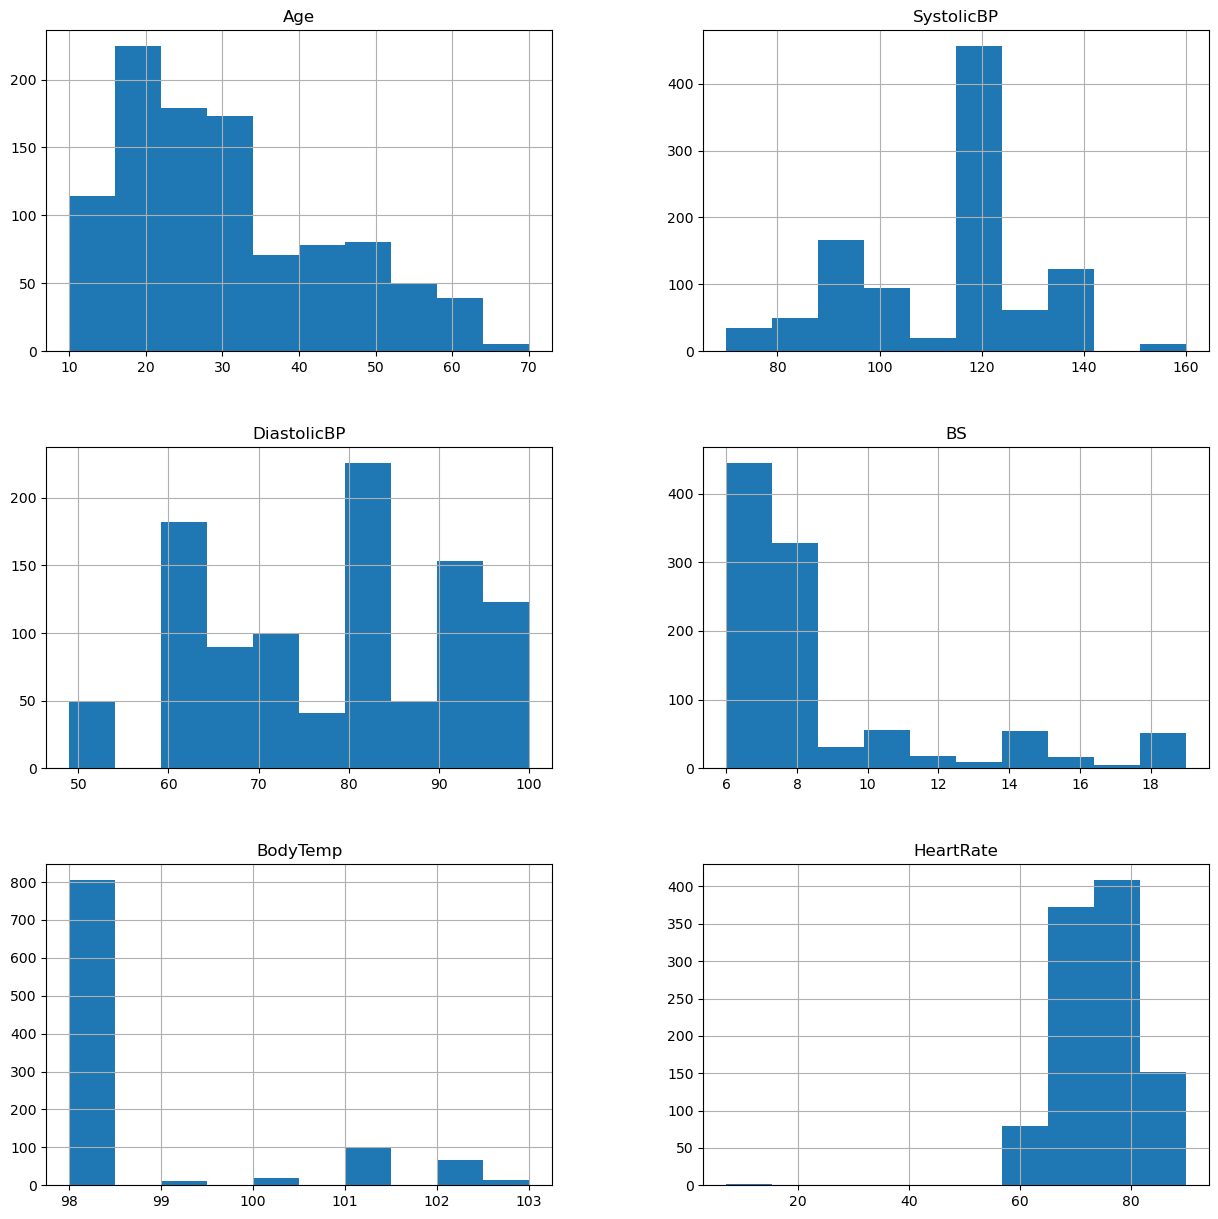

In [19]:
# Displays data as histogram
dataset.hist(layout=(3,2), figsize=(15,15))